In [59]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm

In [60]:
#código de la clase
class Planeta:

    def __init__(self, e, a, t):

        self.t = t
        self.dt = t[1] - t[0] # Paso del tiempo

        self.e = e # Excentricidad
        self.a_ = a # Semi-eje mayor

        self.G = 4*np.pi**2 # Unidades gaussianas

        self.r = np.zeros(3)
        self.v = np.zeros_like(self.r)
        self.a = np.zeros_like(self.r)

        self.r[0] = self.a_*(1-self.e)
        self.v[1] = np.sqrt( self.G*(1+self.e)/(self.a_*(1.-self.e)) )

        self.R = np.zeros((len(t),len(self.r)))
        self.V = np.zeros_like(self.R)

        # El valor del pasado
        self.rp = self.r

    def GetAceleration(self):

        d = np.linalg.norm(self.r)
        self.a = -self.G/d**3*self.r


    def Evolution(self,i):

        self.SetPosition(i)
        self.SetVelocity(i)
        self.GetAceleration()

        if i==0:
            self.r = self.rp + self.v*self.dt
        else:

            # rp pasado, r presente rf futuro
            self.rf = 2*self.r - self.rp + self.a*self.dt**2
            self.v = (self.rf - self.rp)/(2*self.dt)

            self.rp = self.r
            self.r = self.rf

    def SetPosition(self,i):
        self.R[i] = self.r

    def SetVelocity(self,i):
        self.V[i] = self.v

    def GetPosition(self,scale=1):
        return self.R[::scale]

    def GetVelocity(self,scale=1):
        return self.V[::scale]

    def GetPerihelio(self):

        Dist = np.linalg.norm(self.R,axis=1)

        timeup = []

        for i in range(1,len(Dist)-1):
            if Dist[i] < Dist[i-1] and Dist[i] < Dist[i+1]:
                timeup.append(self.t[i])

        # PAARA OBETENR SOLO EL PRIMERO

        return timeup[0]



In [61]:
def GetPlanetas(t):

    Mercurio = Planeta(0.2056,0.307,t)
    Venus = Planeta(0.0067,0.7233,t)
    Tierra = Planeta(0.01671,1.,t)

    return [Mercurio,Venus,Tierra]

In [62]:
dt = 0.001
tmax = 5
t = np.arange(0.,tmax,dt)
Planetas = GetPlanetas(t)

In [63]:
def RunSimulation(t,Planetas):

    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):

        #print(it)
        for i in range(len(Planetas)):
            Planetas[i].Evolution(it)
            # Aca debes agregar la interaccion con la pared


    return Planetas

In [64]:
Planetas = RunSimulation(t,Planetas)
Planetas[1].GetPerihelio()

Running simulation: 100%|██████████| 5000/5000 [00:00<00:00, 28027.16 Steps/s]


0.552

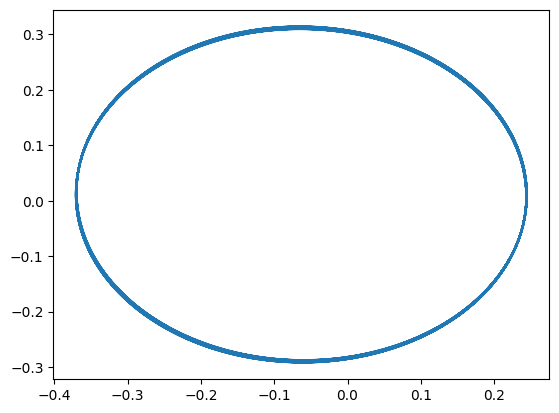

In [65]:
scale = 20
t1 = t[::scale]
plt.plot(Planetas[0].GetPosition()[:,0],Planetas[0].GetPosition()[:,1])

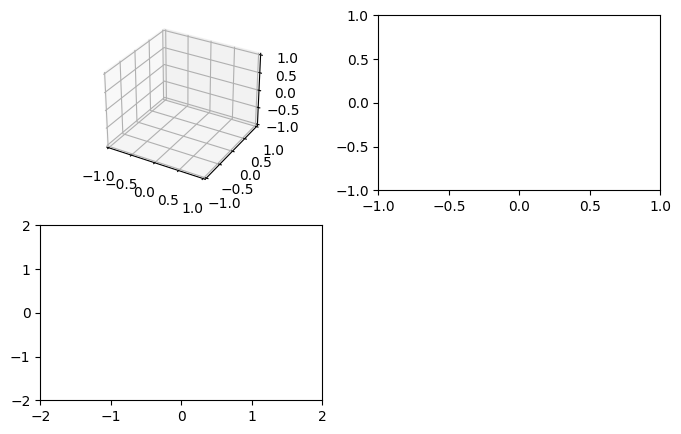

In [66]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(221,projection='3d')
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)

colors=['r','k','b']

def init():

    ax.clear()
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    ax.set_zlim(-1,1)

    ax1.clear()
    ax1.set_xlim(-1,1)
    ax1.set_ylim(-1,1)

    ax2.clear()
    ax2.set_xlim(-2,2)
    ax2.set_ylim(-2,2)

def Update(i):

    init()

    for j, p in enumerate(Planetas):

        x = p.GetPosition(scale)[i,0]
        y = p.GetPosition(scale)[i,1]
        z = p.GetPosition(scale)[i,2]

        vx = p.GetVelocity(scale)[i,0]
        vy = p.GetVelocity(scale)[i,1]
        vz = p.GetVelocity(scale)[i,2]

        ax.scatter(0,0,0,s=200,color='y')
        ax.quiver(x,y,z,vx,vy,vz,color=colors[j],length=0.03)

        ax.scatter(x,y,z,color=colors[j])

        circle = plt.Circle((x,y),0.1,color=colors[j],fill=True)
        ax1.add_patch(circle)

    # Mercurio visto desde tierra
    Mx = Planetas[0].GetPosition(scale)[:i,0] - Planetas[2].GetPosition(scale)[:i,0]
    My = Planetas[0].GetPosition(scale)[:i,1] - Planetas[2].GetPosition(scale)[:i,1]

    # Venus visto desde tierra
    Vx = Planetas[1].GetPosition(scale)[:i,0] - Planetas[2].GetPosition(scale)[:i,0]
    Vy = Planetas[1].GetPosition(scale)[:i,1] - Planetas[2].GetPosition(scale)[:i,1]

    ax2.scatter(Mx,My,marker='.',label='Mercurio')
    ax2.scatter(Vx,Vy,marker='.',label='Venus')

Animation = anim.FuncAnimation(fig,Update,frames=len(t1),init_func=init)

In [71]:
intervalo_tiempo = np.arange(0, 12, 0.001)

parametros_planetas = [
    {'excentricidad': 0.2056, 'distancia_media': 0.387},
    {'excentricidad': 0.006, 'distancia_media': 0.723},
    {'excentricidad': 0.0167, 'distancia_media': 1},
    {'excentricidad': 0.0934, 'distancia_media': 1.524},
    {'excentricidad': 0.0484, 'distancia_media': 5.20}
]

planetas = [Planeta(planeta['excentricidad'], planeta['distancia_media'], intervalo_tiempo) for planeta in parametros_planetas]


nombres_planetas = ['Mercurio', 'Venus', 'Tierra', 'Marte', 'Jupiter']
diccionario_planetas = {'Planetas': nombres_planetas}
planetas = RunSimulation(intervalo_tiempo, planetas)


Periodo = [planeta.GetPerihelio() for planeta in planetas]

diccionario_planetas['Periodo'] = Periodo
print(diccionario_planetas)

Running simulation: 100%|██████████| 12000/12000 [00:01<00:00, 11148.62 Steps/s]

{'Planetas': ['Mercurio', 'Venus', 'Tierra', 'Marte', 'Jupiter'], 'Periodo': [0.23900000000000002, 0.546, 0.97, 1.8760000000000001, 11.847]}


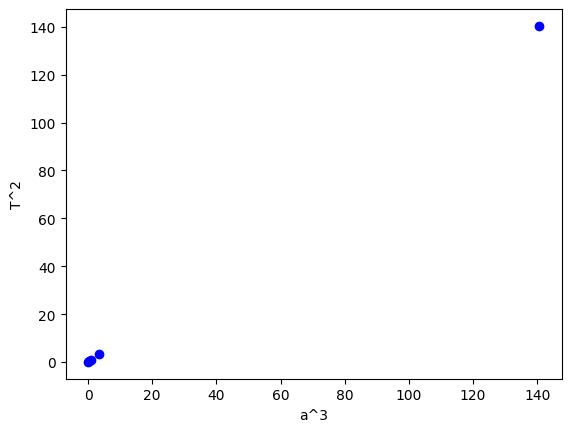

In [68]:
ejes_cubo=[0.387**3,0.723**3,1,1.524**3,5.20**3]
periodo2=[x**2 for x in Periodo]

plt.scatter(ejes_cubo,periodo2,c='b')
plt.xlabel('a^3')
plt.ylabel('T^2')
plt.show()

In [69]:
def regresion_lineal(ejes_cubo, periodo2):
    promedio_x = np.mean(ejes_cubo)
    promedio_y = np.mean(periodo2)

    diferencias_x = [valor_x - promedio_x for valor_x in ejes_cubo]
    diferencias_y = [valor_y - promedio_y for valor_y in periodo2]

    productos_xy = [valor_x * valor_y for valor_x, valor_y in zip(ejes_cubo, periodo2)]
    productos_x_cuadrado = [valor_x**2 for valor_x in ejes_cubo]

    suma_productos_xy = sum(productos_xy)
    suma_productos_x_cuadrado = sum(productos_x_cuadrado)
    masa_sol_gaussianas = suma_productos_x_cuadrado / suma_productos_xy

    return masa_sol_gaussianas

masa_sol_gaussianas = regresion_lineal(ejes_cubo, periodo2)
print(f"Masa del Sol en unidades gaussianas: {masa_sol_gaussianas}")

Masa del Sol en unidades gaussianas: 1.0018351015052525
